In [ ]:
#Загрузка данных
import pandas as pd
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Понимание данных
print(df.shape)
print(df.dtypes)
df.describe()

(10841, 13)
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#Изменяем тип данных в столбце "Last Updated"
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
#Меняем типы данных в остальных столбцах
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace('Everyone','0')
                                if isinstance(x, str) else x).astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: x.replace('3.0M', '3000000')
                                if isinstance(x, str) else x).astype(float)
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [ ]:
df['Size'] = df['Size'].replace('\D', '', regex=True).replace('','0').astype('int')

df['Size']


0        19
1        14
2        87
3        25
4        28
         ..
10836    53
10837    36
10838    95
10839     0
10840    19
Name: Size, Length: 10841, dtype: int64

In [ ]:
df['Installs'] = df['Installs'].replace('Free', '0')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].replace('', '0').astype(float)
df['Installs']

<ipython-input-174-4fd81dc014e5>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [ ]:
#Очистка данных
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
#Удаляем колонку Rating из-за большого количества пропусков
df.drop(columns=['Rating'], inplace=True)
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159.0,19,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967.0,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510.0,87,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644.0,25,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967.0,28,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
#Визуализация данных
import matplotlib.pyplot as plt
install_by_category = df[['Category', 'Installs']].groupby('Category').count().sort_values(by='Installs')
install_by_category


,Installs
Category,
1.9,1
BEAUTY,53
PARENTING,60
COMICS,60
EVENTS,64
ART_AND_DESIGN,65
WEATHER,82
LIBRARIES_AND_DEMO,85
AUTO_AND_VEHICLES,85


<Axes: title={'center': 'Топ 6 категорий по количеству установок'}, xlabel='Category', ylabel='Количество установок приложений'>

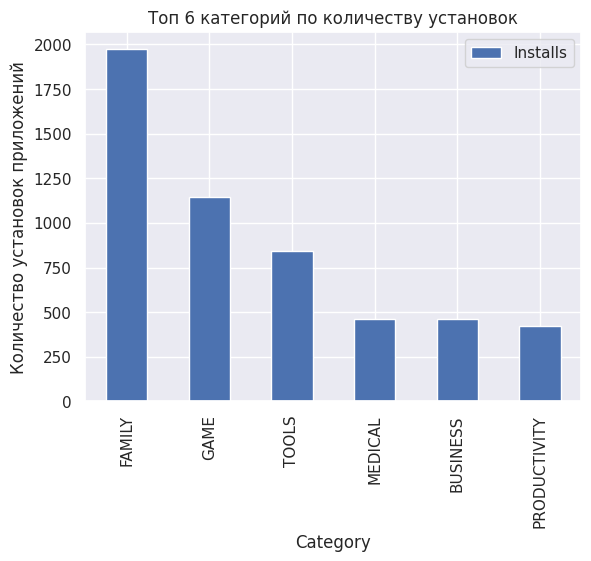

In [ ]:
install_by_category.loc[['GAME', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY', 'TOOLS', 'FAMILY']].sort_values(by='Installs', ascending=False).plot(kind='bar',
                                                                  title='Топ 6 категорий по количеству установок',
                                                                  xlabel='Category',
                                                                  ylabel='Количество установок приложений')

In [ ]:
#Столбчатая диаграмма показывает преподчтения пользователей в зависимости от категорий

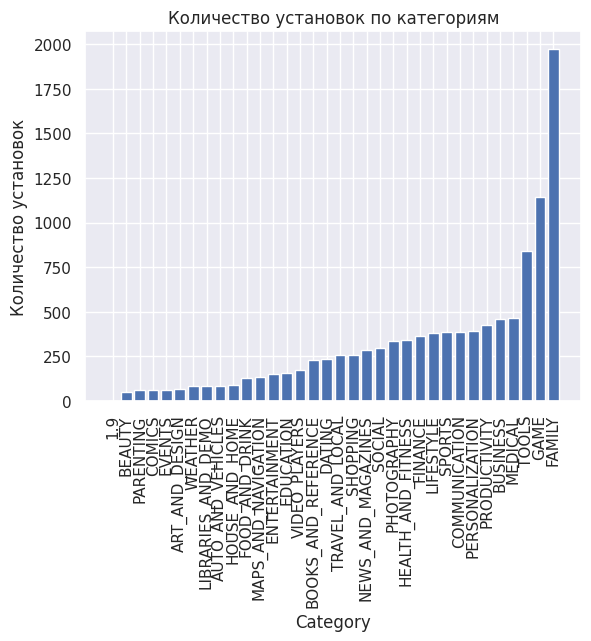

In [ ]:
# Visualize the data
plt.bar(install_by_category.index, install_by_category['Installs'])
plt.xlabel('Category')
plt.ylabel('Количество установок')
plt.xticks(rotation=90)
plt.title('Количество установок по категориям')
plt.show()

In [ ]:
### Гипотеза: Категория с наибольшим количеством установок будет самой популярной и будет иметь самую высокую вовлеченность пользователей.


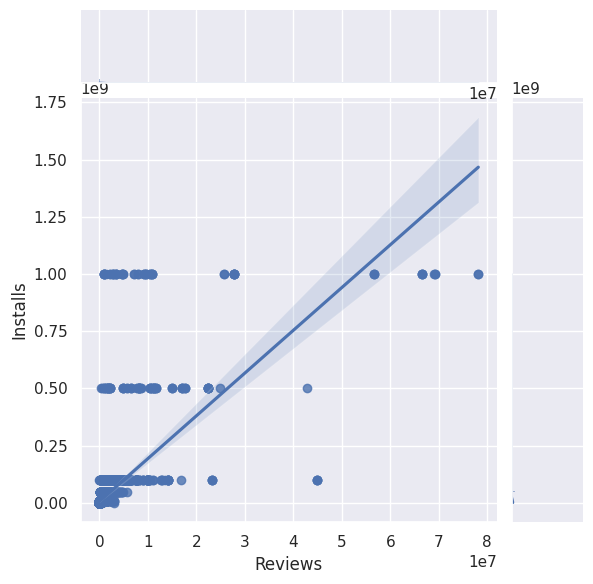

In [ ]:
#Зависимость отзывов пользователей от установок
import seaborn as sns
sns.jointplot(x='Reviews', y='Installs', data=df, kind='reg')

In [ ]:
#Существует прямая корреляционная зависимость между количеством установок приложения и количеством отзывов.
#Гипотеза: При росте количества установок ожидается увеличение числа отзывов

In [ ]:
#Гипотеза: Приложения меньшего размера будут иметь большее количество установок  по сравнению с приложениями большего размера.

In [ ]:
#Гипотеза: Категории с более высокой вовлеченностью пользователей получат большее количество отзывов

In [ ]:
install_by_genres = df[['Genres', 'Installs']].groupby('Genres').count().sort_values(by='Installs')
install_by_genres

,Installs
Genres,
Role Playing;Education,1
Strategy;Creativity,1
Communication;Creativity,1
Strategy;Education,1
Comics;Creativity,1
...,...
Business,460
Medical,463
Education,549


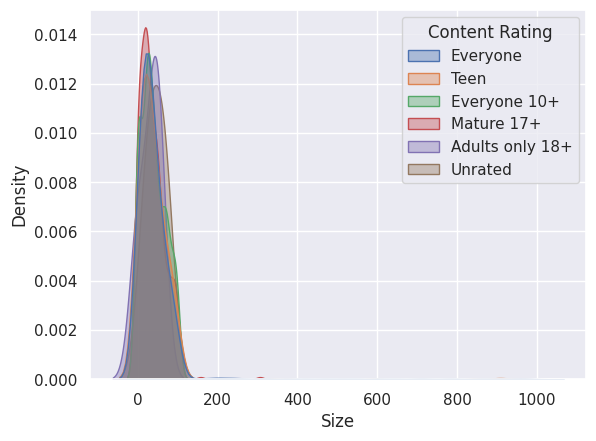

In [ ]:
# With transparency
sns.kdeplot(data=df, x="Size", hue="Content Rating", fill=True, common_norm=False, alpha=0.4)
plt.show()

In [ ]:
#Рейтинг контента существенно не влияет на размер. Таким образом, рейтинг контента не имеет сильной связи с размером приложения.

<ipython-input-156-86da92174da7>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x="Price", hue="Content Rating", common_norm=False, multiple="fill", alpha=1)


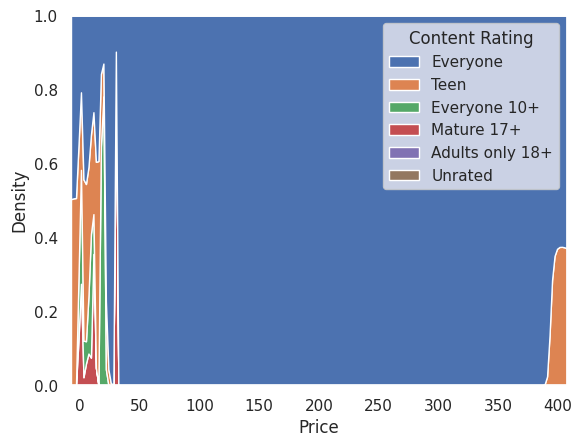

In [ ]:
# set seaborn whitegrid theme
sns.set(style="dark")

# stacked density plot
sns.kdeplot(data=df, x="Price", hue="Content Rating", common_norm=False, multiple="fill", alpha=1)

# show the graph
plt.show()

In [ ]:
#Гипотеза: подростки с большей вероятностью совершат дорогостоящие покупки (свыше 400 долларов), в то время как остальные возрастные группы с большей вероятностью совершат покупки по более низкой цене (ниже 50 долларов).
#Эта гипотеза предполагает, что может существовать корреляция между возрастной группой и покупательским поведением: подростки демонстрируют тенденцию к покупкам по более высокой цене.

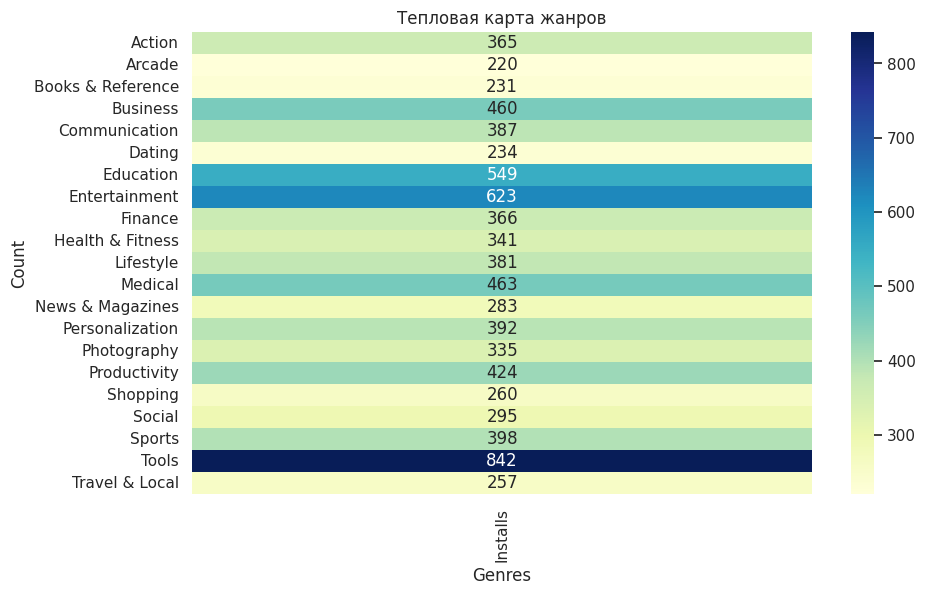

In [ ]:
filtered_genres = install_by_genres[install_by_genres['Installs'] > 200]

pivoted_data = filtered_genres.pivot_table(index='Genres', values='Installs')

sns.set()

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(pivoted_data, cmap='YlGnBu', annot=True, fmt='g')

plt.title('Тепловая карта жанров')
plt.xlabel('Genres')
plt.ylabel('Count')

plt.xticks(rotation=90)

plt.show()

In [ ]:
#Гипотеза: некоторые жанры приложений более популярны, чем другие, и, следовательно, привлекают больше пользователей для установки.

<Figure size 1200x600 with 0 Axes>

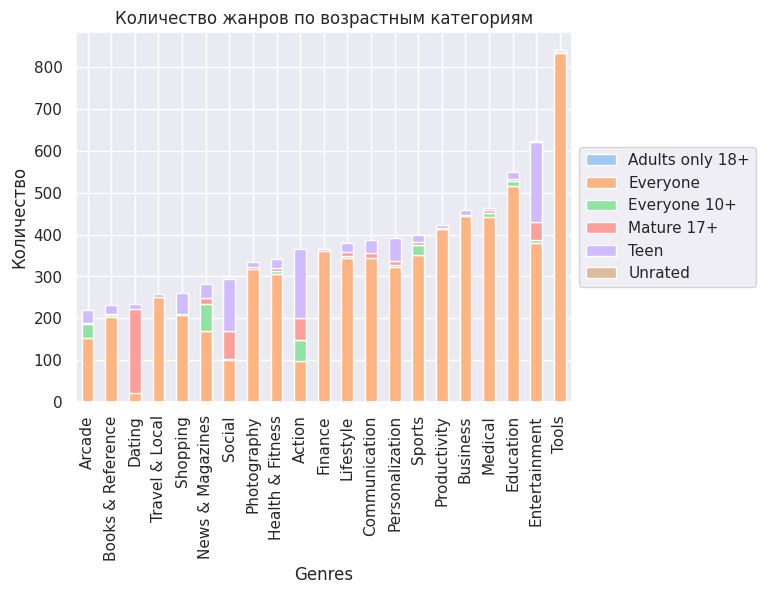

In [ ]:
# Фильтруем жанры с количеством более 200
filtered_genres = install_by_genres[install_by_genres['Installs'] > 200]

# Генерируем количество жанров по возрастным группам
genre_rating_counts = df.groupby(['Genres', 'Content Rating']).size().unstack().fillna(0)
genre_rating_counts = genre_rating_counts.loc[filtered_genres.index]

sns.set()

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Генерируем цветовую палитру
colors = sns.color_palette('pastel')

genre_rating_counts.plot(kind='bar', stacked=True, color=colors)

plt.title('Количество жанров по возрастным категориям')
plt.xlabel('Genres')
plt.ylabel('Количество')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=90)

plt.show()

In [ ]:
#Распределение разных возрастных групп варьируется в зависимости от разных жанров. Определенные жанры устанавливают определенные возрастные категории.

<ipython-input-161-894fb512cf82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_genres.sort_values(by='Installs', ascending=False, inplace=True)


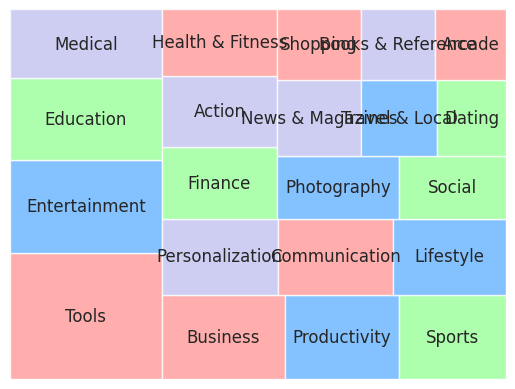

In [ ]:
import squarify

filtered_genres = install_by_genres[install_by_genres['Installs'] > 200]

filtered_genres.sort_values(by='Installs', ascending=False, inplace=True)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

df = pd.DataFrame({'Genres': filtered_genres.index, 'Counts': filtered_genres['Installs']})

df.reset_index(drop=True, inplace=True)

squarify.plot(sizes=df['Counts'], label=df['Genres'], color=colors, alpha=0.8)

plt.axis('off')

plt.show()

In [ ]:
#Гипотеза: существует разница в популярности между разными жанрами в зависимости от количества их установок

<Figure size 2000x1000 with 0 Axes>

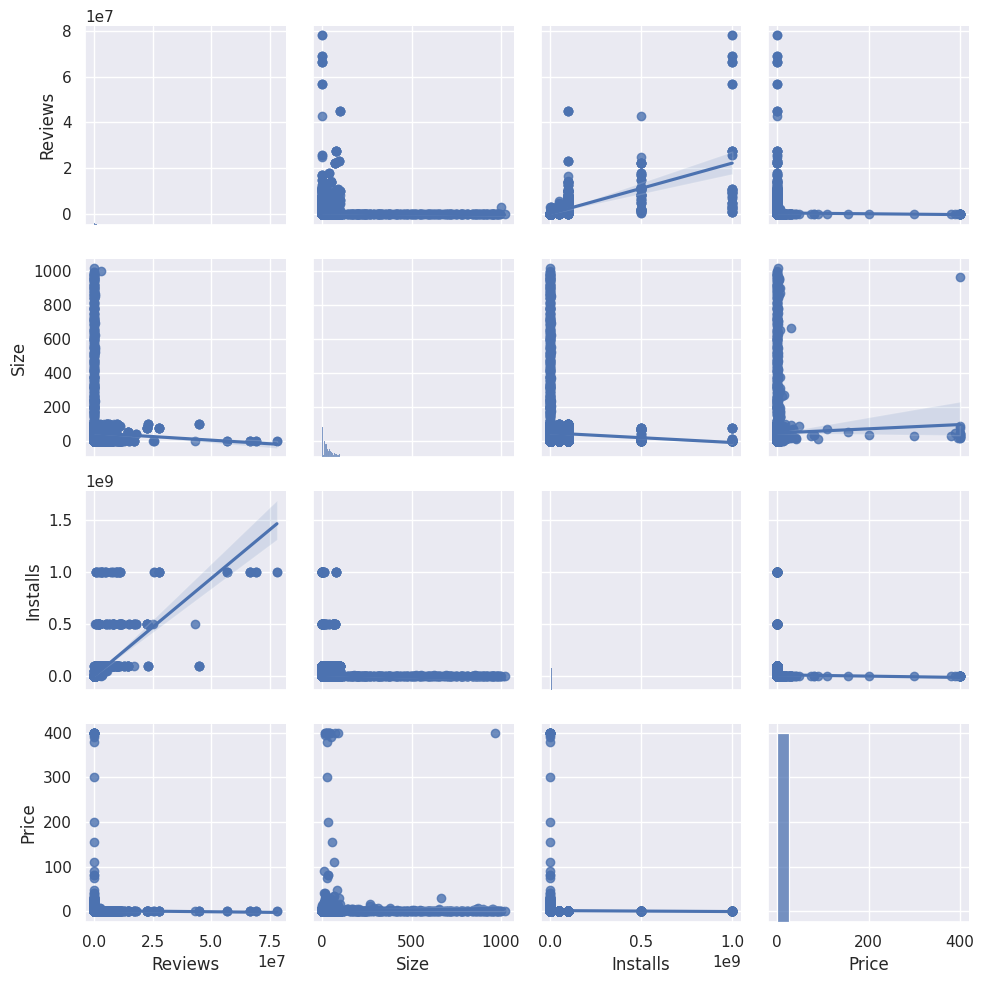

In [ ]:
plt.figure(figsize=(20, 10))
g = sns.pairplot(df, kind='reg')

plt.show()

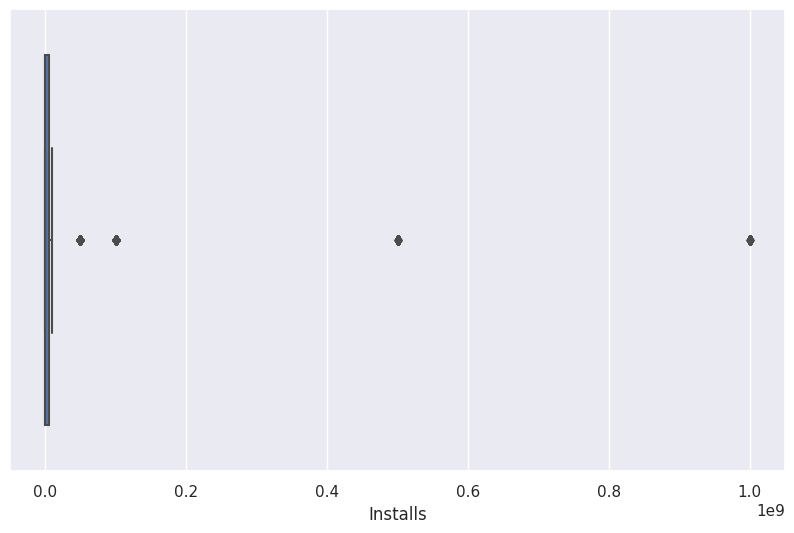

In [ ]:
plt.figure(figsize=(10, 6)) # Изменение размера фигуры
sns.boxplot(x=df["Installs"])
plt.show()